In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
m51h_file = "/Users/devlin/Desktop/College/Astro 217/M51/h_m51_h_s20_drz_sci.fits"
m51h=fits.open(m51h_file)
m51h.info()
m51h_data = m51h[0].data
m51h.close()

m51b_file = "/Users/devlin/Desktop/College/Astro 217/M51/h_m51_b_s20_drz_sci.fits"
m51b=fits.open(m51b_file)
m51b.info()
m51b_data = m51b[0].data
m51b.close()

m51v_file = "/Users/devlin/Desktop/College/Astro 217/M51/h_m51_v_s20_drz_sci.fits"
m51v=fits.open(m51v_file)
m51v.info()
m51v_data = m51v[0].data
m51v.close()

m51i_file = "/Users/devlin/Desktop/College/Astro 217/M51/h_m51_i_s20_drz_sci.fits"
m51i=fits.open(m51i_file)
m51i.info()
m51i_data = m51i[0].data
m51i.close()


Filename: /Users/devlin/Desktop/College/Astro 217/M51/h_m51_h_s20_drz_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1691   (2150, 3050)   float32   
Filename: /Users/devlin/Desktop/College/Astro 217/M51/h_m51_b_s20_drz_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1763   (2150, 3050)   float32   
Filename: /Users/devlin/Desktop/College/Astro 217/M51/h_m51_v_s20_drz_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1763   (2150, 3050)   float32   
Filename: /Users/devlin/Desktop/College/Astro 217/M51/h_m51_i_s20_drz_sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1763   (2150, 3050)   float32   


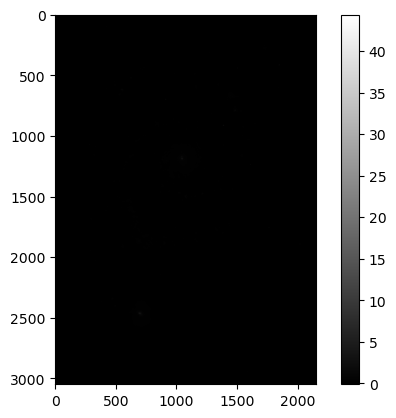

In [3]:
plt.imshow(m51h_data, cmap='gray')
plt.colorbar()

In [4]:
np.min(m51h_data), np.max(m51h_data)

(-0.09902308, 44.36522)

Text(0, 0.5, 'Number of Pixels')

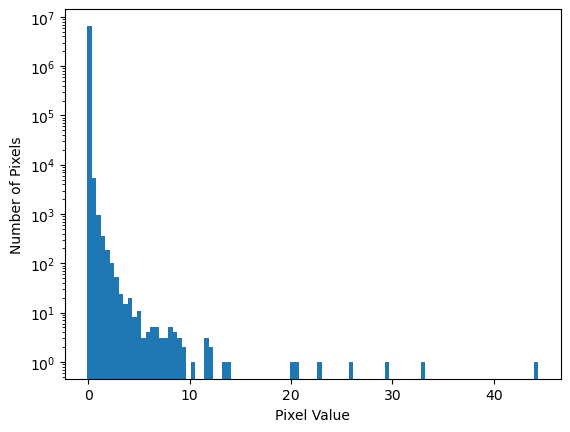

In [5]:
plt.hist(m51h_data.flatten(), log=True, bins=100)
plt.xlabel('Pixel Value')
plt.ylabel('Number of Pixels')

In [6]:
def clip_data(data, minval, maxval):
    assert(maxval>minval)
    delta = maxval - minval
    data = data - minval
    data = data / delta

    data = np.where(data<0, 0, data)
    data = np.where(data>1, 1, data)
    return data

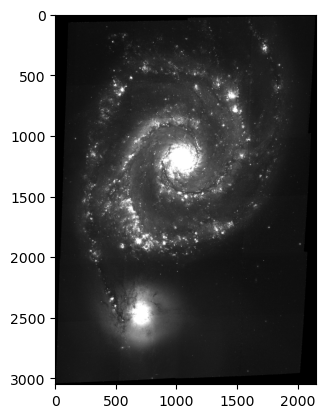

In [7]:

m51h_data_clipped = clip_data(m51h_data, 0, 0.1)
plt.imshow(m51h_data_clipped, cmap='gray')

In [8]:
np.min(m51b_data), np.max(m51b_data)

(-0.024971768, 111.54907)

0.0 1.0


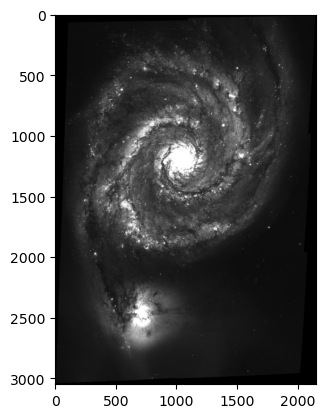

In [9]:
m51b_data_clipped = clip_data(m51b_data, 0, 0.4)
plt.imshow(m51b_data_clipped, cmap='gray')
print(np.min(m51b_data_clipped), np.max(m51b_data_clipped))

0.0 1.0


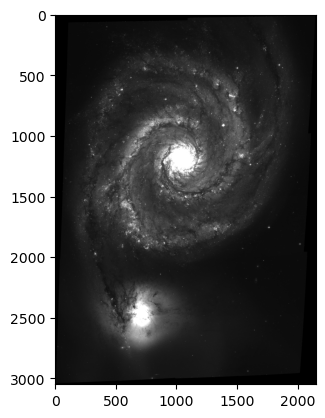

In [10]:
m51v_data_clipped = clip_data(m51v_data, 0, 0.8)
plt.imshow(m51v_data_clipped, cmap='gray')
print(np.min(m51v_data_clipped), np.max(m51v_data_clipped))

0.0 1.0


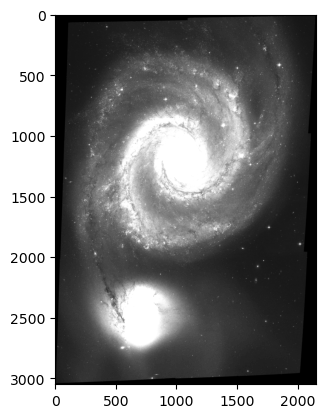

In [11]:
m51i_data_clipped = clip_data(m51i_data, 0, 0.7)
plt.imshow(m51i_data_clipped, cmap='gray')
print(np.min(m51i_data_clipped), np.max(m51i_data_clipped))

In [12]:
m51rgb = np.zeros([3050, 2150, 3])
m51rgb[:,:,0] = m51h_data_clipped
m51rgb[:,:,1] = m51v_data_clipped
m51rgb[:,:,2] = m51b_data_clipped

In [15]:
from PIL import Image

m51rgb_uint8 = (m51rgb * 255).astype(np.uint8)
img = Image.fromarray(m51rgb_uint8)
img.show()
